## **CSMODEL S11 Group 3 - Project 1**
<br>

#### **Members:**
- Jadie, Joshue Salvador A.
- Lopez, Angel L.
- Ponce, Andre Dominic H. 

<br>

#### **Last Modified: August 17, 2021**

### **Spotify Dataset 1922-2021 (~600k Tracks)**

[Spotify](https://www.spotify.com) was founded in 2006 and it is the world's **largest music streaming service provider and platform** with over 365 million monthly active users and 165 million paying subscribers, as of June 2021. As the largest and most accessible platform for music streaming, it contains millions of tracks from different genres, and it can be viewed as the largest track database. With that said, it became an interest to the group if there is a publicly available dataset containing all of Spotify's data. 

For this CSMODEL project, the group decided to use a well known dataset in [Kaggle](https://www.kaggle.com) called the [Spotify dataset](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) whose data was collected, structured, and organized properly by [Yamac Eren Ay](https://www.kaggle.com/yamaerenay), a data scientist and music enthusiast in Germany. The  dataset contains all of the audio features of each uploaded track in Spotify from the years **1922 to 2021** as well as the popularity metrics of the artists that are associated with the tracks. Up until now, the dataset is being updated monthly with the latest update being last April 2021.

With regards to how the data was collected to build the dataset, the Spotify Web API was used as provided by the [Spotify Developers](https://developer.spotify.com) website which also contains the complete documentation for [Spotipy](https://github.com/plamere/spotipy), the **Python** module for accessing and making flexible requests to the **Spotify** web servers in order to retrieve the application's data regarding the available tracks and artists.

Using the Web API, the **search query** of Spotify was used for data collection. As explained by Yamac, search queries such as tracks that were produced in the year 2015 (sample HTTP search query: **`search?q=year:2015`**) were used in order to gather the appropriate data needed to build the dataset. With the audio features of each song and their provided metrics which can be used for research and analysis, the provided **`id`** key of each track was used to retrieve these audio features and their data values.

As the retrieved data contains duplicates and variables whose data type can be changed to a more appropriate data type, data cleaning was executed as well. Methods such as **One-Hot Encoding** and **Imputation** were used to clean and organize the data. The dataset is then ready and was uploaded to Kaggle for data scientists and researchers to explore.

Looking inside the dataset, it is divided into 6 `.csv` files:
- `data_o.csv`: contains the original data of every track's audio features from **1922 to December 2020** , consisting of 170000+ rows. 
- `data_by_artist_o.csv`: contains the overall audio feature metrics of every artist, derived from `data_o` and consists of 30000+ rows.
- `data_by_year_o.csv`: contains the average value of all audio feature metrics per year from **1921 to 2020**, derived from `data_o` and consists of 100+ rows.
- `data_by_genres_o.csv`: contains the average value of all audio feature metrics per genre, derived from `data_by_artist_o` and consists of 3000+ rows.
- `tracks.csv`: the April 2021 version of `data_o`, contains the data of every track's audio features from **1922 to April 2021**, consisting of 600000+ rows.
- `artists.csv`: contains the popularity metrics data of every artist, consists of 1100000+ rows.

As stated, the `tracks` and `artists` files are the datasets that were recently updated last April 2021. The group decided to focus more on the tracks and their audio features as the scope of the project, to determine if some of these audio features strongly affects a single track as well as its relationship to the audience when exposed. With that said, the group will use only the `tracks` dataset for data analysis and statistical inference in this project.

The `tracks` dataset contains many observations (rows) across 20 columns (variables). Each observation represents a track and its audio features. Below are the description of each audio feature (variable) found in the dataset:
- `id`: the track's unique identifier key
- `name`: the name of the track
- `popularity`: the popularity metric value of the track, ranging from 0 to 100
- `duration_ms`: the time duration of the track in milliseconds (ms)
- `explicit`: indicates whether the track contains explicit content or not, represents explicit as 1 and not explicit as 0
- `artists`: the artists that contributed to the track
- `id_artists`: the unique identifier key of the artists that contributed to the track
- `release_date`: the release date of the album containing this track
- `danceability`: how suitable the track is for dancing, ranging from 0 (not danceable) to 1 (very danceable)
- `energy`: value indicating how energetic the track is, ranging from 0 (less energetic) to 1 (very energetic)
- `key`: the major key of the track, represents C as 0, C# as 1, D as 2, ..., B as 11
- `loudness`: how loud the song is in decibels (dB), ranging from -60 (very quiet) to 0 (very loud)
- `mode`: value indicating whether the track is major or minor, represents major as 0 and minor as 1
- `speechiness`: the ratio of spoken words throughout the whole duration of the track, ranging from 0 (instrumental) to 1 (full of lyrics)
- `acousticness`: whether the song is acoustic or not, ranging from 0 (not acoustic) to 1 (very acoustic)
- `instrumentalness`: the ratio of instrumental sounds overall, ranging from 0 (lots of vocal sounds) to 1 (full of instrument sounds)
- `liveness`: presence of audience in the track, ranging from 0 (studio record) to 1 (recorded in a concert)
- `valence`: how positive the music is, ranging from 0 (sad) to 1 (cheerful)
- `tempo`: tempo of the track in Beats Per Minute (BPM)
- `time_signature`: the predicted time signature of the track (how the music is to be counted), ranging from 0 to 5, most typically 4

As observed, there are variables whose names are special terms defined by Spotify such as `danceability`, `energy`, `speechiness`, `acousticness`, `instrumentalness`, and `liveness`. 

Yamac added that the `danceability` values are predicted by a case-specific regression model using the combination of tempo, rhythm stability, beat strength, and overall regularity values. Meanwhile `energy` values are calculated using the dynamic range, perceived loudness, timbre, onset rate, and general entropy feature values. Further details regarding the calculations of the two variables' values will not be discussed in this notebook as it already requires knowledge regarding advanced music technicalities. With that said, advanced music technical variables in the `tracks` dataset which are `key`, `mode`, `tempo` and `time_signature` will not be used in this project. 

### **Packages and Dataset Setup**

In [155]:
# import the packages needed for exploratory data analysis and statistical inference
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import chisquare

# for matplotlib graphs to be stored in the notebook itself (frontend), for pdf formatting purposes
%matplotlib inline

In [100]:
# load the tracks dataset inside the project using pandas dataframe
tracks_df = pd.read_csv('tracks.csv')

In [101]:
# display the general information of the tracks dataset
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [102]:
# display the shape (dimensions) of the tracks dataset
tracks_df.shape

(586672, 20)

As seen in the output above, there are specifically 586672 observations (rows) and 20 variables (columns) in the `tracks` dataset.

In [103]:
# display the columns (variables) of the tracks dataset
tracks_df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [104]:
# display the first 5 rows of the tracks dataset
tracks_df.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [105]:
# display the last 5 rows of the tracks dataset
tracks_df.tail(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,0.723,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,4


In [106]:
# display the statistics of each column (variable) in the dataset
tracks_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


### **Data Cleaning**

In [107]:
# create a copy of the dataframe to be cleaned
tracks_df_clean = tracks_df.copy()

In [108]:
# check if there are columns that contain null or NaN values
tracks_df_clean.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
                    ..
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
Length: 20, dtype: int64

As observed, the only column that contains `NaN` values is the `name` variable with a total of 71 `NaN` values. The observations containing the `NaN` value in the `name` variable are displayed below.

In [109]:
# display the observations that have the NaN value in the name variable
tracks_df_clean[tracks_df_clean['name'].isnull()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
226336,4iH7negBYMfj2z0wDNmgdx,NaN,28,264973,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1994-01-01,0.512,0.578,0,-12.280,0,0.0299,0.0433,0.000064,0.5160,0.692,156.465,1
510975,04d5kbLvSAIBt3pGcljdhC,NaN,0,184293,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.426,0.285,11,-11.970,1,0.0466,0.9950,0.264000,0.2930,0.583,135.661,4
510976,05tRkgyxVdwMePGqOXMDYU,NaN,0,191587,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.344,0.186,0,-13.495,1,0.0745,0.9950,0.000000,0.1150,0.290,79.591,1
510978,0YAMRgAQH6tkTh4sWNXr8L,NaN,0,191573,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.316,0.257,3,-13.611,0,0.0549,0.9950,0.769000,0.5190,0.529,68.682,3
510979,1K6MQQxmFpPb66ZnaiIpHX,NaN,0,167602,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.558,0.283,1,-12.847,1,0.0646,0.9960,0.000000,0.4530,0.608,70.379,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517206,6OH9mz9aFbGlbf74cBwYWD,NaN,2,209760,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.506,0.598,7,-4.672,0,0.0635,0.7710,0.000001,0.6910,0.800,91.172,4
517215,15RqFDA86slfzujSQMEX4i,NaN,2,257280,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.612,0.615,5,-5.609,1,0.0551,0.8540,0.000023,0.0541,0.809,90.536,4
520127,0hKA9A2JPtFdg0fiMhyjQD,NaN,6,194081,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1974-12-31,0.471,0.369,4,-12.927,0,0.1460,0.9680,0.001100,0.1410,0.766,94.063,4
525238,1kR4gIb7nGxHPI3D2ifs59,NaN,26,289440,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1998-01-05,0.501,0.583,7,-9.460,0,0.0605,0.6900,0.003960,0.0747,0.734,138.391,4


Despite the value of the `name` variable being `NaN` in these observations, the other variables are not null and contains the correct and appropriate values which are significant for statistical analysis. With that said, these observations will stay in the dataset and will not be dropped. 

As reported by Yamac in the April 2021 (recent) version of this dataset, there are tracks (observations) that contain default values in all of its audio features which is an error that resulted from the Spotify Web API's continuous data generation process. These observations are also redundant as they all both contain the same default values for all audio features with the value of the `name` variable being 'Pause Track'. The redundant observations are displayed below.

In [110]:
# display the redundant observations with default values
tracks_df_clean[tracks_df_clean['name'] == 'Pause Track']

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1291,1JUFU8XJRWgG9Ir8KlLvpW,Pause Track,0,4000,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1423,2fKnluaRpiiCFHWwKFkIgN,Pause Track,0,4000,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1429,2jdIDTMKpzrw7agn1Whtse,Pause Track,0,4000,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1441,2s6e7KLoQ5hie3Cnh73v2v,Pause Track,0,3344,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1460,35GlCW5aqb8iJAdLuUf7tF,Pause Track,0,4000,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,52qf3kN9pExTlHdSlh3ZeR,Pause Track,0,3344,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1753,6XWCeD5XNqZr5XPVZUDn1G,Pause Track,0,4000,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1824,7bgYtpP5qxWabDHsPY8Rwc,Pause Track,0,4000,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1843,7nZNkbxnRyx1DqPC6ro6Je,Pause Track,0,4000,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


These redundant observations shall be dropped from the dataset as they all contain meaningless data which can greatly affect the statistical results of this project.

In [111]:
# get the columns of the tracks dataset as a list
tracks_df_columns = tracks_df_clean.columns.tolist()

# get the columns that do not contain default values in the redundant observations
columns_to_remove = ['id', 'duration_ms']

# get the columns with the default values
default_columns = list(set(tracks_df_columns).difference(set(columns_to_remove)))

# drop the duplicates
tracks_df_clean.drop_duplicates(subset=default_columns, keep=False, ignore_index=True, 
                                inplace=True)

# get the index of the last observation containing the default values
index = tracks_df_clean[tracks_df_clean['name'] == 'Pause Track'].index

# drop the last observation containing the default values
tracks_df_clean.drop(index, axis=0, inplace=True)

In [112]:
# display the release_date column (series)
tracks_df_clean['release_date']

0         1922-02-22
1         1922-06-01
2         1922-03-21
3         1922-03-21
4               1922
             ...    
584061    2020-09-26
584062    2020-10-21
584063    2020-09-02
584064    2021-03-05
584065    2015-07-01
Name: release_date, Length: 584065, dtype: object

As seen in the output, there is an observation whose `release_date` string value contains only the year which means that there are observations that might contain `release_date` string values that are missing the month, day, or even both. With that said, every value in the `release_date` column are checked and updated to be in the same format (*YYYY-MM-DD*) as needed before having its data type converted to the pandas `datetime` object data type.

In [113]:
# function to update the date string value to follow the YYYY-MM-DD format
def update_date (date):
    # if date is missing both month and day, assume that month and day is January 1
    if len(date) == 4:
        date = date + '-01-01'
    # if date is missing day, assume that it is the first day of the month
    elif len(date) == 7:
        date = date + '-01'
    return date

# update the values in the release_date column
tracks_df_clean['release_date'] = tracks_df_clean['release_date'].apply(update_date)

As observed in the `release_date` column, it contains strings indicating the year, month, and day when each track was released. As these 3 date unit values can be used separately for different analysis questions, the `release_date` column's data type shall be converted to pandas `datetime` object data type in order to extract and separate the 3 values from each other. 3 new columns are added to the `tracks` dataframe for the year, month, and day values.

In [114]:
# convert to datetime object
tracks_df_clean['release_date'] = pd.to_datetime(tracks_df_clean['release_date'], 
                                                 format='%Y/%m/%d %H:%M:%S')

# get the year, month, and day values and separate each of them into new columns
tracks_df_clean['release_year'] = tracks_df_clean['release_date'].dt.year.astype('Int64')
tracks_df_clean['release_month'] = tracks_df_clean['release_date'].dt.month.astype('Int64')
tracks_df_clean['release_day'] = tracks_df_clean['release_date'].dt.day.astype('Int64')

# display the first 5 rows of the dataset
tracks_df_clean.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,release_month,release_day
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922,2,22
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922,6,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922,3,21
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922,3,21
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,...,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922,1,1


Now that the year, month, day values are separated from each other, the `release_date` column shall be dropped as it will not be used anymore in the project. 

In [115]:
# drop release_date column (series)
tracks_df_clean.drop(columns='release_date', inplace=True)

# display the first 5 rows of the dataset
tracks_df_clean.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,release_month,release_day
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,...,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922,2,22
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,...,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922,6,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,...,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922,3,21
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,...,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922,3,21
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,...,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922,1,1


In [116]:
# display the artists column (series)
tracks_df_clean['artists']

0                                 ['Uli']
1                     ['Fernando Pessoa']
2                     ['Ignacio Corsini']
3                     ['Ignacio Corsini']
4                         ['Dick Haymes']
                       ...               
584061                        ['阿YueYue']
584062                     ['ROLE MODEL']
584063                        ['FINNEAS']
584064    ['Gentle Bones', 'Clara Benin']
584065                      ['Afrosound']
Name: artists, Length: 584065, dtype: object

As the elements of the `artists` column are arrays, check if there are array elements that are empty or contain only an empty string.

In [117]:
# get artists column (series) and extract the string values away from the list
artists = tracks_df_clean['artists'].str.strip('[]')

# remove the single quote marks on each string value in the artists column
artists = artists.apply(lambda x : x.replace("'", ''))

# display the artists column and its converted values
artists

0                               Uli
1                   Fernando Pessoa
2                   Ignacio Corsini
3                   Ignacio Corsini
4                       Dick Haymes
                    ...            
584061                      阿YueYue
584062                   ROLE MODEL
584063                      FINNEAS
584064    Gentle Bones, Clara Benin
584065                    Afrosound
Name: artists, Length: 584065, dtype: object

In [118]:
# check if there are empty strings in the artists column
artists[artists == '']

224647     
508641     
508642     
508644     
508645     
         ..
514676     
514685     
517597     
522708     
522735     
Name: artists, Length: 71, dtype: object

As seen in the output shown above, there are tracks that do not have artists identified. With that said, the arrays containing the empty string value only shall be replaced with the `NaN` value instead in the `artists` column of the dataframe.

In [119]:
# replace arrays with empty string in the artists column with NaN
tracks_df_clean['artists'] = tracks_df_clean['artists'].replace("['']", np.nan)

# check if arrays containing the empty string are indeed converted to the NaN value
tracks_df_clean['artists'].isnull().any()

True

As previously stated, there are advanced music technical variables in the dataset specifically `key`, `mode`, `tempo`, and `time_signature`. These together with the `id` and `id_artists` columns shall be dropped from the dataframe as these will not be used in the project.

In [120]:
# get column names to be dropped from the dataframe
columns_to_drop = ['id', 'id_artists', 'key', 'mode', 'tempo', 'time_signature']

# drop columns
tracks_df_clean.drop(columns=columns_to_drop, inplace=True)

# display the first 5 rows of the dataset
tracks_df_clean.head(5)

,name,popularity,duration_ms,explicit,artists,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,release_year,release_month,release_day
0,Carve,6,126903,0,['Uli'],0.645,0.4450,-13.338,0.4510,0.674,0.7440,0.151,0.127,1922,2,22
1,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],0.695,0.2630,-22.136,0.9570,0.797,0.0000,0.148,0.655,1922,6,1
2,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],0.434,0.1770,-21.180,0.0512,0.994,0.0218,0.212,0.457,1922,3,21
3,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],0.321,0.0946,-27.961,0.0504,0.995,0.9180,0.104,0.397,1922,3,21
4,Lady of the Evening,0,163080,0,['Dick Haymes'],0.402,0.1580,-16.900,0.0390,0.989,0.1300,0.311,0.196,1922,1,1


### **Exploratory Data Analysis**

##### ***What is the correlation between chosen audio features in the dataset?***

For this question, it is one of the group's curiosities to determine the **relationships** between the audio features as to how these affect the track itself. To acquire the needed statistics, set of pairs between all chosen audio features are made and the correlation value is calculated for each of these pairs. To do that efficiently, the correlation heatmap is used. Specifically, the audio features that the group wants to know the possible relationships with are:
- `popularity`
- `duration_ms`
- `explicit`
- `danceability`
- `energy`
- `loudness`
- `speechiness`
- `acousticness`
- `instrumentalness`
- `liveness`
- `valence`

In [121]:
# get the variables (columns) that will not be included in the correlation heatmap
columns_to_drop = ['name', 'artists', 'release_year', 'release_month', 'release_day']

# drop the columns
tracks_df_corr = tracks_df_clean.drop(columns=columns_to_drop)

# display the acquired dataframe
tracks_df_corr

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,6,126903,0,0.645,0.4450,-13.338,0.4510,0.674,0.744000,0.1510,0.1270
1,0,98200,0,0.695,0.2630,-22.136,0.9570,0.797,0.000000,0.1480,0.6550
2,0,181640,0,0.434,0.1770,-21.180,0.0512,0.994,0.021800,0.2120,0.4570
3,0,176907,0,0.321,0.0946,-27.961,0.0504,0.995,0.918000,0.1040,0.3970
4,0,163080,0,0.402,0.1580,-16.900,0.0390,0.989,0.130000,0.3110,0.1960
...,...,...,...,...,...,...,...,...,...,...,...
584061,50,258267,0,0.560,0.5180,-7.471,0.0292,0.785,0.000000,0.0648,0.2110
584062,72,153293,0,0.765,0.6630,-5.223,0.0652,0.141,0.000297,0.0924,0.6860
584063,70,187601,0,0.535,0.3140,-12.823,0.0408,0.895,0.000150,0.0874,0.0663
584064,58,142003,0,0.696,0.6150,-6.212,0.0345,0.206,0.000003,0.3050,0.4380


In [122]:
# get the pairwise correlation of all variables in the acquired dataframe
corr = tracks_df_corr.corr()

# display the results in dataframe first
corr

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
popularity,1.000000,0.027897,0.212626,0.187039,0.301369,0.327272,-0.048310,-0.370468,-0.233183,-0.049705,0.002797
duration_ms,0.027897,1.000000,-0.016790,-0.120632,0.024826,-0.000407,-0.126250,-0.064453,0.069102,0.002305,-0.162785
explicit,0.212626,-0.016790,1.000000,0.150197,0.122824,0.134719,0.102187,-0.148758,-0.066986,-0.012933,-0.016812
danceability,0.187039,-0.120632,0.150197,1.000000,0.238875,0.248195,0.199170,-0.240532,-0.223897,-0.106563,0.527301
energy,0.301369,0.024826,0.122824,0.238875,1.000000,0.764471,-0.054287,-0.714316,-0.192152,0.124841,0.371362
...,...,...,...,...,...,...,...,...,...,...,...
speechiness,-0.048310,-0.126250,0.102187,0.199170,-0.054287,-0.169010,1.000000,0.069769,-0.102139,0.207566,0.045915
acousticness,-0.370468,-0.064453,-0.148758,-0.240532,-0.714316,-0.518572,0.069769,1.000000,0.200716,-0.005010,-0.179816
instrumentalness,-0.233183,0.069102,-0.066986,-0.223897,-0.192152,-0.326689,-0.102139,0.200716,1.000000,-0.038624,-0.173349
liveness,-0.049705,0.002305,-0.012933,-0.106563,0.124841,0.029110,0.207566,-0.005010,-0.038624,1.000000,-0.000452


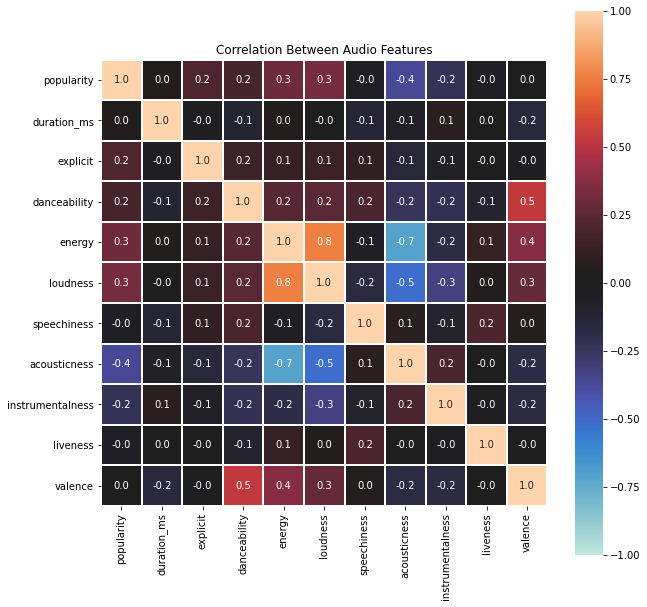

In [123]:
# set plot figure size
plt.figure(figsize=(10, 10), facecolor='white')

# setup correlation heatmap with seaborn
sb.heatmap(corr, vmax=1, vmin=-1, center=0, linewidth=0.4, 
           square=True, annot=True, annot_kws={'size':10}, fmt='.1f')

# display the correlation heatmap
plt.title('Correlation Between Audio Features')
plt.show()

The range of correlation values from `-1` to `1` are categorized below:
- `-1` --> perfect negative correlation
- `-0.9` to `-0.7` --> very high negative correlation
- `-0.6` to `-0.5` --> high negative correlation
- `-0.4` to `-0.3` --> moderate negative correlation
- `-0.2` to `-0.1` --> low negative correlation
- `0` --> no correlation
- `0.1` to `0.2` --> low positive correlation
- `0.3` to `0.4` --> moderate positive correlation
- `0.5` to `0.6` --> high positive correlation 
- `0.7` to `0.9` --> very high positive correlation
- `1` --> perfect positive correlation

For the group, the notable correlations are those whose values are from the range `-1.0 to -0.3` if negative correlation and `0.3 to 1.0` if positive correlation; moderate to very high correlations.

With the results displayed above, the following are the group's interpretations about the notable correlations as observed:
- With a correlation value of `0.3`, there is a ***moderate positive correlation*** between `popularity` and `energy`.
- With a correlation value of `0.3`, there is a ***moderate positive correlation*** between `popularity` and `loudness`.
- With a correlation value of `-0.4`, there is a ***moderate negative correlation*** between `popularity` and `acousticness`.
- With a correlation value of `0.5`, there is a ***high positive correlation*** between `danceability` and `valence`.
- With a correlation value of `0.8`, there is a ***very high positive correlation*** between `energy` and `loudness`.
- With a correlation value of `-0.7`, there is a **very high negative correlation** between `energy` and `acousticness`.
- With a correlation value of `0.4`, there is a ***moderate positive correlation*** between `energy` and `valence`.
- With a correlation value of `-0.5`, there is a ***high negative correlation*** between `loudness` and `acousticness`.
- With a correlation value of `-0.3`, there is a ***moderate negative correlation*** between `loudness` and `instrumentalness`.
- With a correlation value of `0.3`, there is a ***moderate positive correlation*** between `loudness` and `valence`.

##### ***What is the total number of tracks released for each year?***

With Spotify containing millions of tracks and each track has an indicated release date, it can be used to approximately determine the total number of tracks released from each year. For this EDA question, the year `2021` will not be involved in the analysis as it only contains data from `January` to `April 2021` unlike the previous years wherein they all contain data from `January` to `December`, as already completed years; the weight of the data collected in `2021` is **not in par** with the data of the previous years. With that said, the group wants to start off by determining the `earliest year` available in the dataset first.

In [124]:
# get the earliest year in the dataset
tracks_df_clean['release_year'].min()

1900

The earliest year in the dataset is `1900`. Lets get the observations (rows) in the dataset containing the earliest year.

In [125]:
# get the observation/s with the earliest year in the dataset
tracks_df_clean[tracks_df_clean['release_year'] == tracks_df_clean['release_year'].min()]

,name,popularity,duration_ms,explicit,artists,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,release_year,release_month,release_day
476374,Maldita sea la primera vez,19,233920,0,['Los Pincheira del Sur'],0.659,0.791,-4.895,0.0295,0.139,0.000002,0.161,0.956,1900,1,1


There is only `one` track in the dataset that was released in 1900 which is `Maldita sea la primera vez`. Now let's get the **total number of tracks** released for each year starting from `1900 to 2021`.

In [126]:
# to display all rows in the output
pd.set_option('display.max_rows', None)

# display the total number of tracks released from each year
tracks_df_clean['release_year'].value_counts()

2020    13898
1998    12485
1999    12482
1997    12349
1996    12056
2019    11891
1995    11585
2014    11190
2016    11075
2018    10920
1994    10713
2015    10575
2013    10515
1990    10203
1992    10038
1991     9893
2017     9879
1989     9751
2012     9726
2008     9698
2011     9653
2009     9585
2010     9578
2004     9229
1988     8926
1986     8924
2002     8873
2005     8849
2007     8766
2006     8743
1987     8385
1980     8293
2003     8206
1985     7877
1984     7784
1981     7649
2000     7557
1982     7545
2001     7253
1983     7122
1993     7030
1979     6861
1975     6622
1977     6601
1978     6501
1974     6341
1976     6133
1972     5996
1973     5709
2021     5625
1970     5585
1971     5453
1969     5292
1968     5229
1965     5200
1962     5004
1960     5000
1967     4948
1964     4766
1961     4751
1959     4521
1963     4425
1958     4346
1955     4063
1956     3878
1957     3790
1954     3574
1950     3043
1953     2905
1966     2637
1951     2595
1952  

In [127]:
# set pandas max row display option value back to 10
pd.set_option('display.max_rows', 10)

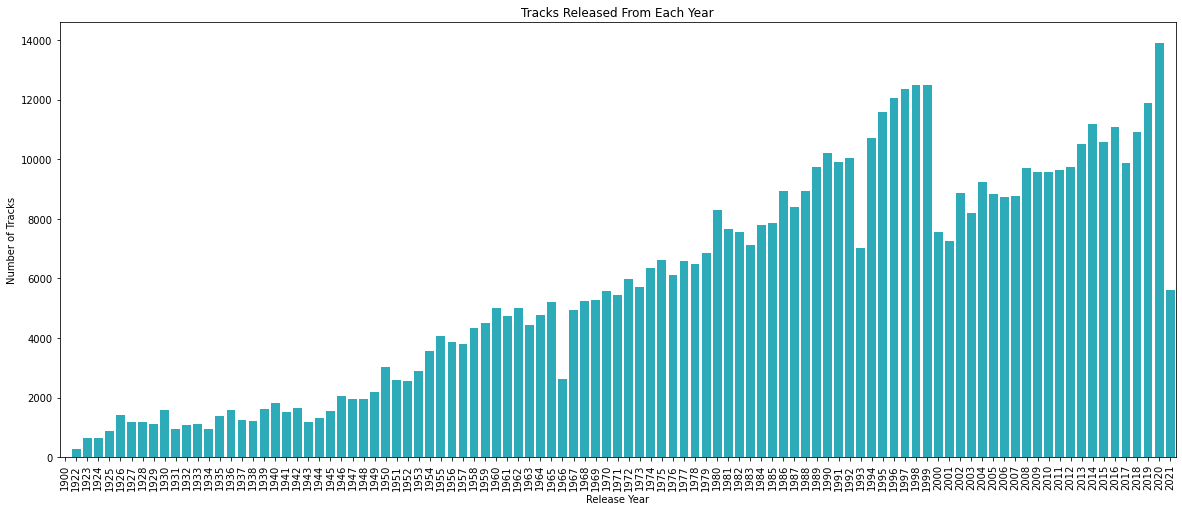

In [128]:
# setup figure size
plt.figure(figsize=(20, 8), facecolor='white')

# setup count plot with seaborn and matplotlib
sb.countplot(data=tracks_df_clean, x='release_year', color=sb.color_palette()[9])
plt.title('Tracks Released From Each Year')
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('Number of Tracks')

# display count plot
plt.show()

Based on the results, the year with the **least number of tracks released** is `1900` and the year with the **most number of tracks released** is `2020`. It became a notable finding for the group that `2020` has the most number of tracks released in Spotify from `1900` to `2020`. 

##### ***What is the average popularity of energetic and non-energetic songs?***

As previously described, the `energy` audio feature is a value that indicates how energetic a track is, ranging from `0.0 (less energetic)` to `1.0 (very energetic)`. Despite the range and description being provided by the Spotify developers website, there was **no defined threshold value** between the given range to determine if the track is either `energetic` or `non-energetic`. In order to acquire to results for this EDA question, it was decided by the group to acquire the `average popularity` for **each `energy` value** in the defined range. 

First and foremost, the group wants to check first the distribution of the values of both `popularity` and `energy` variables in the dataset. The `mean`, `median`, and `standard deviation` of the variables are calculated below.

In [129]:
# get the mean, median, and standard deviation of popularity variable in the dataset
tracks_df_clean.agg({"popularity": ["mean", "median", "std"]})

,popularity
mean,27.671537
median,27.000000
std,18.327539


Displaying the distribution of `popularity` values with a **histogram**.

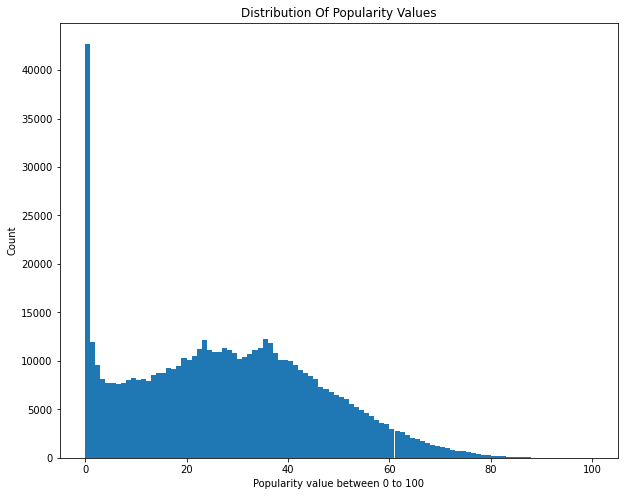

In [130]:
# get bins value
bins_val = np.arange(0, tracks_df_clean["popularity"].max() + 1, 1)

# setup histogram
plt.figure(figsize=[10, 8], facecolor="white")
plt.hist(data=tracks_df_clean, x="popularity", bins=bins_val)
plt.title("Distribution Of Popularity Values")
plt.xlabel("Popularity value between 0 to 100")
plt.ylabel("Count")
plt.show()

As observed in the displayed histogram, the distribution is `right-skewed`. As described by the **documentation in Spotify developers website**, the `popularity` value is calculated based on the track's total number of plays and how recent the plays are. With that said, the distribution being right-skewed is reasonable- most of the tracks have a popularity of `0` as most of them have not been played by users, and no track had a popularity of `100` as they are not that much played. 

In [131]:
# get the mean, median, and standard deviation of energy variable in the dataset
tracks_df_clean.agg({"energy": ["mean", "median", "std"]})

,energy
mean,0.542549
median,0.550000
std,0.251570


Displaying the distribution of `energy` values with a **histogram**.

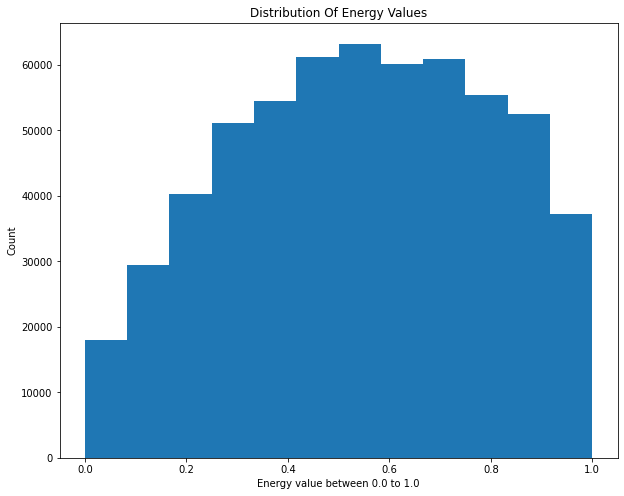

In [132]:
# setup histogram
plt.figure(figsize=[10, 8], facecolor="white")
plt.hist(data=tracks_df_clean, x="energy", bins=12)
plt.title("Distribution Of Energy Values")
plt.xlabel("Energy value between 0.0 to 1.0")
plt.ylabel("Count")
plt.show()

As observed in the histogram, the distribution of `energy` values is approximately normal, the acquired `mean` and `median` are fairly close to one another with a difference of `0.007451`.

Now, to calculate for the `average popularity` of each `energy` value in the defined range, the `popularity` and `energy` variables in the dataset are used. The data results are displayed first in table form.

In [133]:
# group data in the dataset by energy variable
tracks_df_energy = tracks_df_clean.groupby("energy")

# get the average popularity of each energy value
energy_popularity_mean = tracks_df_energy.agg({"popularity": ["mean"]})
energy_popularity_mean = energy_popularity_mean["popularity"].rename(
    columns={"mean":"average_popularity"})
energy_popularity_mean

,average_popularity
energy,
0.00000,21.222222
0.00002,48.500000
0.00002,52.000000
0.00002,45.000000
0.00002,39.333333
...,...
0.99600,23.952941
0.99700,19.771429
0.99800,20.228700


Displaying of each `energy` value with their respective `average popularity` values through a **scatter plot**; to view as well the correlation between the two variables.

Text(0, 0.5, 'Average Popularity')

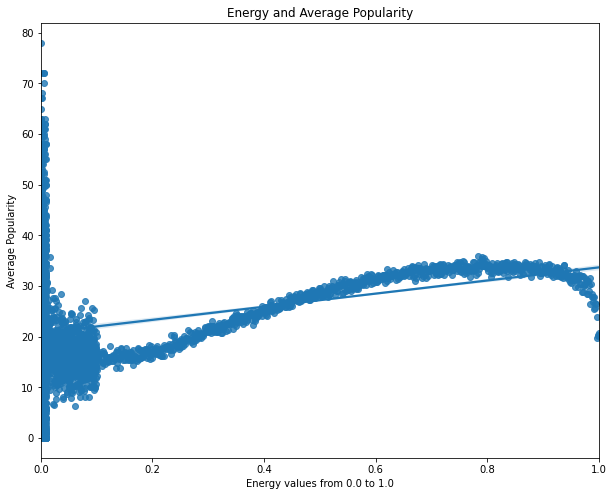

In [134]:
# turn energy value indexes into a column
energy_popularity_mean['energy'] = energy_popularity_mean.index

# setup scatter plot
plt.subplots(1,1,figsize=(10, 8), facecolor="white")
scatter_plot = sb.regplot(data = energy_popularity_mean, x="energy", y = "average_popularity");
scatter_plot.set_title("Energy and Average Popularity");
scatter_plot.set_xlabel("Energy values from 0.0 to 1.0");
scatter_plot.set_ylabel("Average Popularity")

Taking into account that the distribution of the `popularity` values is right-skewed, and with all the observations in the dataset involved in the graph, the plot shows a slightly increasing trend line which means a positive correlation between `energy` and `popularity` as audio features of a track. It may be possible that *energetic* tracks tend to be *more popular*.

### **Research Questions**

With the notable findings and observations acquired from exploring the dataset, two research questions were carefully developed by the group out of curiosity. The developed research questions are stated below:

***`Is there a significant difference between the popularity of energetic and non-energetic tracks?`***

***`Is there a significant difference between the number of tracks released a year before the COVID-19 pandemic broke out in 2019 and during the pandemic itself in 2020?`***

### **Statistical Inference**

##### ***Is there a significant difference between the popularity of energetic and non-energetic tracks?***

For this research question, the group wants to explore the relationship between `popularity` and `energy` in order *to get a general idea as to how a track's energy affect its popularity*. Is there a directly or indirectly proportional relationship between the two variables involved, or does the energy of a track do not affect its popularity at all? Potentially, if there is indeed a relationship, the music industry could utilize this relationship in producing new songs in the future that would more likely become popular.

Before answering the research question, it must be first defined which tracks are **energetic** and **non-energetic**. Since the official Spotify API documentation did not explicitly state the thresholds at which a certain track is considered *energetic* or *non-energetic*, it was decided by the group to divide the defined range of `energy` values into **two groups**. This was done and assumed as it was observed in the ***Exploratory Data Analysis*** section of this notebook that the distribution of `energy` values is approximately normal and that the midpoint value according to the `energy` distribution is `0.5`.

The energy variable being a measure from 0.0 to 1.0 and dividing this range of values into two groups using `0.5` as the midpoint of the distribution, `0.0 to 0.5` will represent `non-energetic tracks`, while `0.51 to 1.0` will represent `energetic tracks`. This is based on the description of the *energy* variable on the official Spotify API documentation - which states that fast, loud, and noisy songs such as *death metal* music will have a higher energy rating, while slow and softer songs such as a *Bach prelude* will have a lower rating. This binning will allow us to compare the two groups and properly address the research question at hand.

Executing the code cell below will generate the first group - which are *non-energetic* tracks.

In [135]:
# retrieve tracks with energy <= 0.5, and sort in descending order
df_non_energetic = tracks_df_clean[tracks_df_clean["energy"] <= 0.5]
non_energetic_sorted = df_non_energetic.sort_values("energy", axis = 0, ascending = False,
                 inplace = False, na_position ='last')
non_energetic_sorted[["energy", "popularity", "name", "artists"]]

,energy,popularity,name,artists
229942,0.5,42,אלעד,['Ravid Plotnik']
478871,0.5,24,El Adagio De Mi Padre,['Gonzalo Paz']
126482,0.5,37,You Are a Danger,['Gary Low']
126476,0.5,37,Pag-Ibig,['APO Hiking Society']
125712,0.5,35,Barstool Blues - 2016 Remaster,"['Neil Young', 'Crazy Horse']"
...,...,...,...,...
22650,0.0,0,StaggerLee Has His Day at the Beach,['Future Rapper']
476178,0.0,46,Aspiradora - Henry,['El Ruido Blanco']
484451,0.0,38,Magic Window,['Boards of Canada']
92170,0.0,36,16 Outro Test 30hz,"['Bebo Best', 'Coimbra', 'The Super Lounge Orc..."


Executing the code cell below will generate the second group - which are *energetic* tracks.

In [136]:
# retrieve tracks with energy > 0.5, and sort in descending order
df_energetic = tracks_df_clean[tracks_df_clean["energy"] > 0.5]
energetic_sorted = df_energetic.sort_values("energy", axis = 0, ascending = False,
                 inplace = False, na_position ='last')
energetic_sorted[["energy", "popularity", "name", "artists"]]

,energy,popularity,name,artists
378952,1.000,1,Marathon [Mix Cut] - Simon O'Shine Remix,"[""Simon O'Shine"", 'Adam Navel']"
378625,1.000,1,Napalm Poet [Mix Cut] - Original Mix,['Adam Ellis']
182667,1.000,15,Lush Rain,['Nataural']
302764,1.000,4,Numb The Pain (Mix Cut) - Original Mix,['Will Atkinson']
12511,1.000,0,Applause; Martha Tilton Returns to Stage - Live,['Benny Goodman']
...,...,...,...,...
484738,0.501,40,Ewigi Liäbi,['Mash']
481971,0.501,27,074 - Im Schattenreich des Dr. Mubase - Teil 05,['TKKG Retro-Archiv']
399938,0.501,26,Akulah Kekasihmu,['Francissca Peter']
549195,0.501,24,MIDNIGHT RENDEZVOUS,['CASIOPEA']


We now compute for the summary statistics of both groups. First is for the popularity of the non-energetic group.

In [137]:
summary_non_energetic = df_non_energetic.agg({"popularity": ["mean", "median", "std", len]})
summary_non_energetic

,popularity
mean,21.785032
median,20.000000
std,17.490008
len,255257.000000


Next is for the popularity of the energetic group.

In [138]:
summary_energetic = df_energetic.agg({"popularity": ["mean", "median", "std", len]})
summary_energetic

,popularity
mean,32.241290
median,32.000000
std,17.646671
len,328808.000000


The mean popularity of the *energetic* group (`32.24`) seems to be higher than that of the *non-energetic* group (`21.79`). We will now test if this difference is statistically significant or not.

Based on the dataset, the difference in popularity of energetic and non-energetic tracks is:

In [139]:
non_energetic_mean = summary_non_energetic.loc["mean"].loc["popularity"]
energetic_mean = summary_energetic.loc["mean"].loc["popularity"]

difference =  energetic_mean - non_energetic_mean
print('{:.2f}'.format(difference))

10.46


In order to answer the first research question, which requires the use of two numerical variables (`popularity` and `energy`), a *T-test for unpaired observations* must be performed.
<br><br>
We begin by establishing the *null* and *alternative* hypotheses:

$H_{0}:$ There is no significant difference between the popularity of energetic and non-energetic songs.

$H_{A}:$ There is a significant difference between the popularity of energetic and non-energetic songs.
<br><br>
or alternatively:

$$H_{0}: \mu = 0$$

$$H_{A}: \mu \neq 0$$

Hypothesis testing will be done using a `95% confidence interval`. We perform the T-test as follows:

In [140]:
# T-test using scipy
ttest_ind(df_non_energetic["popularity"],
          df_energetic["popularity"],
          equal_var = False)

Ttest_indResult(statistic=-225.74318287036752, pvalue=0.0)

The computed *T-score* is `-225.74`, while the *p-value* computed is `0.0`. The *p-value* is 0.0 because the whole dataset - which consists of almost 600,000 observations - was used in the T-test. This then resulted to a very small p-value. The group also tried getting various samples from both the non-energetic and energetic groups and perform a T-test on all of it in order to verify if the result is accurate. The group has observed that as the sample size increases, the p-value becomes smaller. This supports the fact that as the sample size approaches the size of the dataset itself, its p-value becomes smaller as well. Since the group utilized the whole dataset for the T-test above - which contains almost 600,000 observations - a very small p-value was returned. With this, the group was convinced that the T-score and p-value above is accurate.

#### **Conclusion and Insights for Research Question 1**

For the first research question, given a *p-value* of `0.0` and a confidence interval of `0.05`, since the *p-value* is less than `0.05`, we therefore **reject** the null hypothesis. With that said, there is indeed a significant difference between the popularity of non-energetic and energetic tracks in Spotify. **This implies that the popularity of a non-energetic track would differ significantly from energetic ones in Spotify**.

##### ***Is there a significant difference between the number of tracks released a year before the COVID-19 pandemic broke out in 2019 and during the pandemic itself in 2020?***

We are all aware that the COVID-19 pandemic has drastically changed different aspects of people's lives including their lifestyle, job opportunities, and even hobbies. For this research question, the group would like to focus on the possible impact of COVID-19 in the music industry. As seen in the Exploratory Data Analysis, it became a notable finding that `2020` has the most number of tracks released from 1900 to 2020, despite the pandemic. 

We would like to determine if there is a significant difference between the number of tracks that were released a year before the Covid-19 broke out `(2019)` and the year during the pandemic `(2020)` itself. With everyone confined to their homes during the lockdown phase of this pandemic and with the collapse of live shows and concerts, we want to know whether it has also affected the distribution of music in Spotify. 

As a recap, during the data preprocessing, we have added the variable `release_year` to the dataset which represents the **year of the release date of the album that contains the track**. For this research question, `binned data will be applied`. We will count the rows that are associated with the `2019` and `2020` released years. 


Executing the code cell below will the get the total number of tracks released in `2019`, `2020` and `2019-2020` together.

In [141]:
# songs released year 2019 (Pre-pandemic)
tracks_2019 = tracks_df_clean [(tracks_df_clean["release_year"] == 2019)]
tracks_2019_count = tracks_2019.shape[0]

# songs released year 2020 (pandemic)
tracks_2020 = tracks_df_clean [(tracks_df_clean["release_year"] == 2020)]
tracks_2020_count = tracks_2020.shape[0]

print ('Total number of tracks from 2019-2020: {:.0f}\n'.format(tracks_2019_count + tracks_2020_count))
print ('No. of tracks released on year 2019: {:.0f}' .format(tracks_2019_count))
print ('No. of tracks released on year 2020: {:.0f}' .format(tracks_2020_count))

Total number of tracks from 2019-2020: 25789

No. of tracks released on year 2019: 11891
No. of tracks released on year 2020: 13898


To visualize properly data presented above, we are going to convert the counts into a `table format`. A new `DataFrame` is created for this.

The group also decided to represent the data in a `bar plot`.

In [142]:
data = {
    '2019' : [tracks_2019_count],
    '2020' : [tracks_2020_count]
}

# creating the new data frame, combining the counts for each year (2019, 2020)
df_2019_2020 = pd.DataFrame(data, columns = ['2019', '2020'], index=["no_of_tracks"])

# displaying the dataframe in a table format
df_2019_2020

,2019,2020
no_of_tracks,11891,13898


Executing the code cell below will generate the bar plot for the created DataFrame's values.

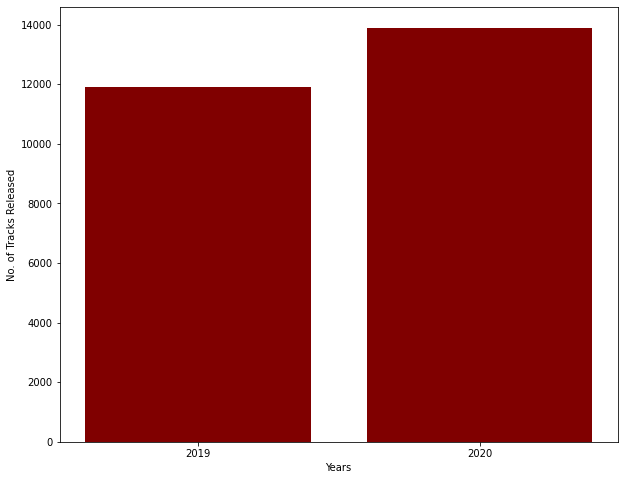

In [150]:
# creating the dataset
data = {'2019':tracks_2019_count, '2020':tracks_2020_count}
years = list(data.keys())
values = list(data.values())

# setup the bar plot  
fig = plt.figure(figsize = (10, 8), facecolor="white")
plt.bar(years, values, color ='maroon')
plt.xlabel("Years")
plt.ylabel("No. of Tracks Released")
plt.show()

Given the data above, the group aims to explore the significance of the pandemic to the the number of tracks being released. Has the number of tracks produced **significantly and greatly increased in 2020 despite the pandemic**?

We begin by establishing the `null` and the `alternative` hypothesis.

There is a total of `25844` tracks released from year `2019-2020`. Is there enough evidence that more than 50% of the total number of tracks from `2019-2020` was released year 2020?

$H_{0}:$ Atleast 50% of the total number of tracks from 2019 to 2020 were released in 2020
<br>
$H_{A}:$ Less than 50% of the total number of tracks from 2019 to 2020 were released in 2020
<br><br>
or alternatively:

$$H_{0}: \hat{p}  >= .50$$

$$H_{A}: \hat{p} < .50 $$

At first glance, we can already see that the number of tracks released during the year 2020 `(during the pandemic)` is greater compared to the number of tracks released last 2019 `(before the pandemic)`.

However, we are still not sure whether this difference is statistically significant or just a result of a sampling error. In this case, proportion will be utilized in order to determine whether there is a significant difference between the two groups, 2019 and 2020.

First, calculate the proportion of "2019" and "2020" responses in df_2019_2020.
Proportion will be displayed in raw and in percentage. 

In [151]:
total_no_songs_2019_2020 = tracks_2019_count + tracks_2020_count
print ('Total number of Tracks released 2019-2020: {}\n' .format(total_no_songs_2019_2020))

# 2019
p_2019 = tracks_2019_count/total_no_songs_2019_2020
print ("Sample proportion of tracks released in 2019:")
print ('Raw: {}'.format(p_2019))
print ('Percentage: {:.2f}% \n'.format(p_2019*100))

# 2020
p_2020 = tracks_2020_count/total_no_songs_2019_2020
print ("Sample proportion of tracks released in 2020:")
print ('Raw: {}'.format(p_2020))
print ('Percentage: {:.2f}%'.format(p_2020*100))

Total number of Tracks released 2019-2020: 25789

Sample proportion of tracks released in 2019:
Raw: 0.46108806080111675
Percentage: 46.11% 

Sample proportion of tracks released in 2020:
Raw: 0.5389119391988832
Percentage: 53.89%


Since the main focus for this problem are the tracks released year `2020`, we have decided to use confidence intervals and significance tests for a `single proportion` only, prioritizing the sample proportion of 2020.

First, we construct a 90% confidence interval for the said proportion. The result will be reported as:

$$proportion \pm marginoferror\%$$

Since we are dealing with categorical data, the `margin of error` will be obtained through the `standard error` of `sample population`. The formula that will be used is:

$$marginoferror =  z^* \sqrt{\frac{p(1-p)}{n}}$$

where $z^*$ still representing the `critical value`.

In [153]:
# critical value, z*, for a 95% confidence interval
# proportion for the 2020 is 53.93%, variable: p_2020
# sample size = variable: total_no_songs_2019_2020

z_star = norm.ppf (0.975)

margin_of_error = (z_star * np.sqrt((( p_2020 * (1 - p_2020)) / total_no_songs_2019_2020)))
print ('Raw: {}' .format(margin_of_error))
print('Margin of Error: {:.2f}'.format(margin_of_error))

Raw: 0.006083894592405802
Margin of Error: 0.01


Given a `95% confidence level`, we have determined that the `margin of error` is `0.01`. Now, we are going to compute the confidence interval.

In [154]:
# p_2020 (proportion); margin_of_error (margin of error)
lower_limit_95 = p_2020 - margin_of_error
upper_limit_95 = p_2020 + margin_of_error

print ('Lower Limit: {:.2f}'.format(lower_limit_95))
print ('Upper Limit: {:.2f}'.format(upper_limit_95))

Lower Limit: 0.53
Upper Limit: 0.54


For this task, the group will be utilizing the `One-way Chi-square Test` to get the `chisquare value` and the `p-value`.

Note that the observed percentage is `53.93%` and the expected percentage is `atleast 50.00%` for `2020` and the observed percentage is `46.07%` and the expected percentage is `atleast 50.00%` for `2019`.

The `chisquare value` and `p-value` are calculated using scipy.stats' chisquare function.

In [168]:
# get proportion percentage of 2019 and 2020 as observed frequencies
observed_frequencies = [p_2019, p_2020]

# expected frequencies for both are 50.00%
expected_frequencies = [0.5, 0.5]

# compute for the chisquare value and p-value
chisquare(observed_frequencies, f_exp=expected_frequencies)

Power_divergenceResult(statistic=0.006056556048870347, pvalue=0.9379681518361461)

As displayed, the `chisquare value` is `0.006056556048870347` and the `p-value` is `0.9379681518361461`.

#### **Conclusion and Insights for Research Question 2**

Given that the p-value is `0.9379681518361461` is greater `0.05`, the chosen significance level:
- At a significance level of `0.05`, the group concludes that there is an enough evidence to accept the `null hypothesis` wherein atleast 50% of tracks were released in 2020.

From the test results above, we can now say that despite the pandemic going on right now, regardless of the crisis that continues to spill over into the operations of live concerts, tech startups, recording tracks, and the music industry as a whole, this has not stopped the artists to bringing out their music. Furthermore, due to the pandemic, it may be possible that this had gave opportunities to many artists to produce more tracks as staying safely in their homes.